In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# function for finding OLS
def ols(x1, x2, y):
    n = len(y)
    x = np.column_stack((np.ones(n), x1, x2))
    beta_hat = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    
    intercept = beta_hat[0]
    slope_1 = beta_hat[1]
    slope_2 = beta_hat[2]
    
    return intercept, slope_1, slope_2, beta_hat

In [39]:
# make function for ploting decision boundary
def plot_decision_boundary(X, intercept, slope_1, slope_2):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = np.linspace(-1,2,100)
    m = -slope_1/slope_2
    c = -intercept/slope_2
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(5,5))
    sns.scatterplot(data=df, 
                    x="X1", 
                    y="X2", 
                    hue="y")
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    
    plt.plot(x1, x2, "red")

In [71]:
# function for predicting given data
def predict(X):    
    # Calculate the predicted values of y for each observation in the dataset
    y_pred = beta_hat[0] + beta_hat[1]*df['X1'] + beta_hat[2]*df['X2']

    # Classify the predicted values of y using a threshold value of 0
    y_class = np.where(y_pred > 0, 1, -1)
    
    return y_class

In [73]:
# accuracy
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [63]:
# Make dataset
dictt = {
    "X1":[0,0,1,1],
    "X2":[0,1,0,1],
    "y":[-1,1,1,1]
}

df = pd.DataFrame(dictt)
df

,X1,X2,y
0,0,0,-1
1,0,1,1
2,1,0,1
3,1,1,1


In [64]:
# Extract the values from the DataFrame
x = df[['X1', 'X2']].values
y = df['y'].values

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='X2'>

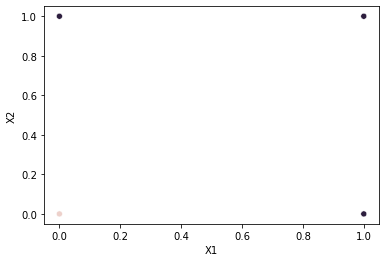

In [65]:
# plot existing dataset
sns.scatterplot(df["X1"], df["X2"], hue=df['y'], legend=None)

In [66]:
# Calculate the OLS coeff
intercept, slope_1, slope_2, beta_hat = ols(X.iloc[:,0], X.iloc[:,1], y)
intercept, slope_1, slope_2

(-0.5, 1.0, 1.0)

In [67]:
beta_hat

array([-0.5,  1. ,  1. ])

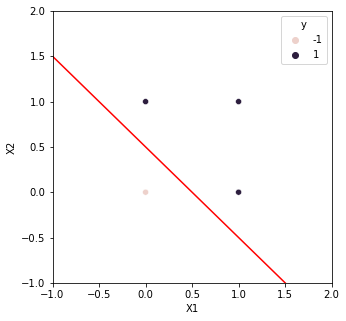

In [68]:
# plot decision boundary
plot_decision_boundary(X, intercept, slope_1, slope_2)

In [72]:
# predict
y_hat = predict(X)
y_hat

array([-1,  1,  1,  1])

In [74]:
# find accuracy score
accuracy(y, y_hat)

1.0